In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
#%matplotlib inline 

In [70]:
er1 = pd.read_csv('C:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\ABM\\ENC_Py3_mra\\EU_output\\Amsterdam\\enrichment_df.csv').drop(columns=['Unnamed: 0','Outside'])
er2 = pd.read_csv('C:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\ABM\\ENC_Py3_mra\\EU_output\\Amsterdam\\enrichment_df_run1.csv').drop(columns=['Unnamed: 0','Outside'])

name_map={}
for i in range(len(landuse_cols)):
    name_map[i+1] = landuse_cols[i]
name_map

{1: 'Agriculture',
 2: 'Greenhouses',
 3: 'Mineral/Industry',
 4: 'Public Amenities',
 5: 'Commercial',
 6: 'Residential (L)',
 7: 'Residential (M)',
 8: 'Residential (H)',
 9: 'Recreation',
 10: 'Nature',
 11: 'Water',
 12: 'Transport',
 13: 'Airport'}

In [71]:
er1.head()

,Agriculture,Greenhouses,Mineral/Industry,Public Amenities,Commercial,Residential (L),Residential (M),Residential (H),Recreation,Nature,Water,Transport,Airport,q,max_d
0,0.127753,0.000000,0.000000,0.000000,0.796227,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
1,0.000000,1.348246,0.586812,0.196453,0.291591,-0.576754,-0.524329,0.0,-0.316053,0.181272,0.115611,0.930134,0.93932,1.0,0.0
2,0.357554,0.000000,0.000000,0.000000,-0.498941,0.000000,-0.735182,0.0,0.000000,-1.481486,0.000000,0.000000,0.00000,2.0,0.0
3,-0.179799,0.000000,0.000000,0.435048,0.056905,-0.754487,0.000000,0.0,0.000000,-0.080922,0.507181,0.767082,0.00000,3.0,0.0
4,-0.135489,0.000000,0.657534,0.000000,0.607133,-0.040005,-0.278189,0.0,0.021603,-0.163676,-0.406714,0.478855,0.00000,4.0,0.0


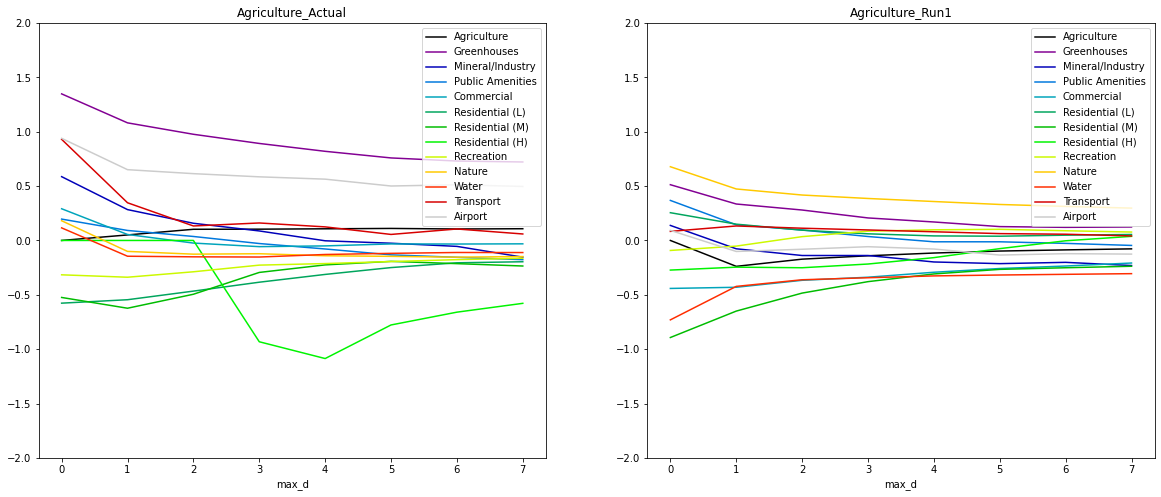

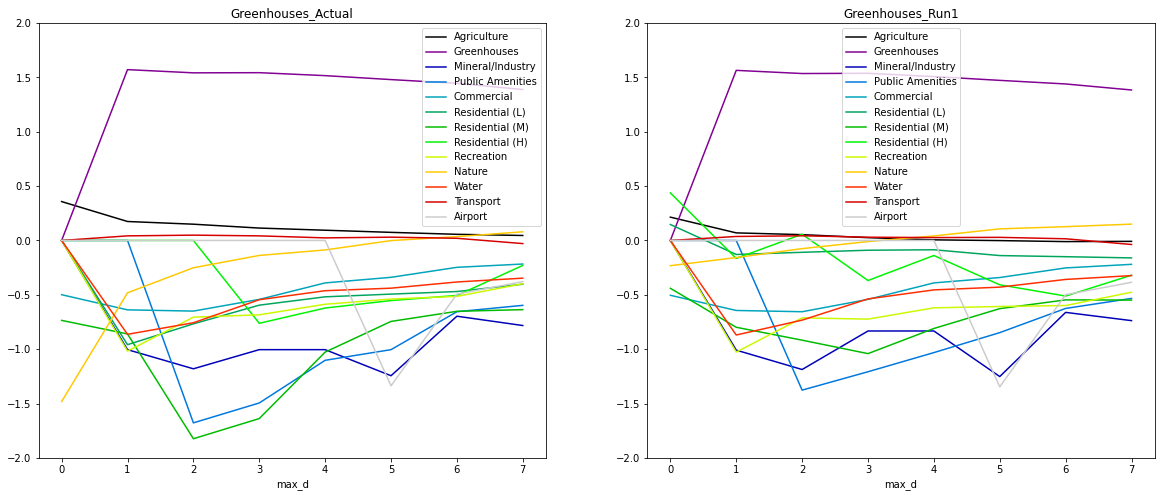

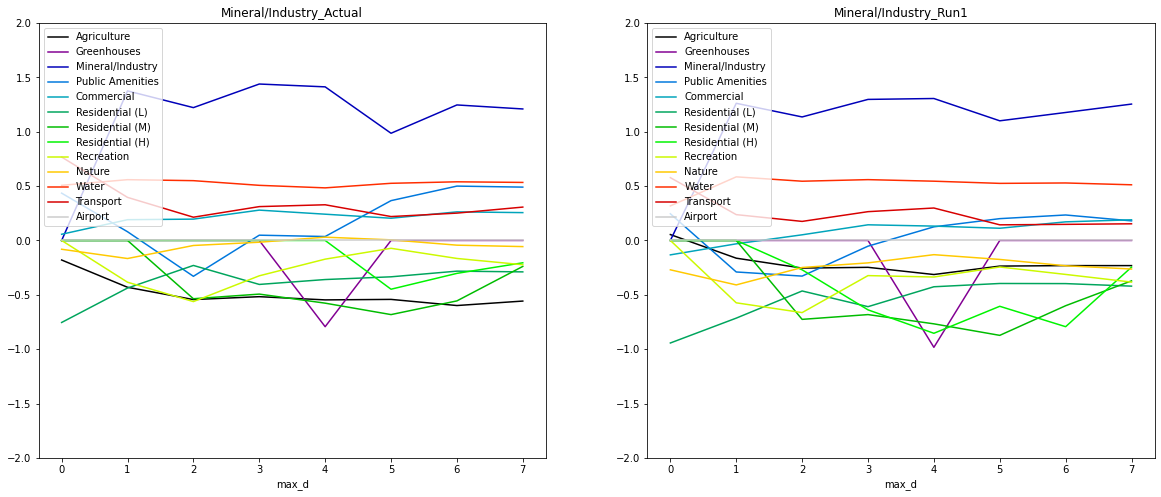

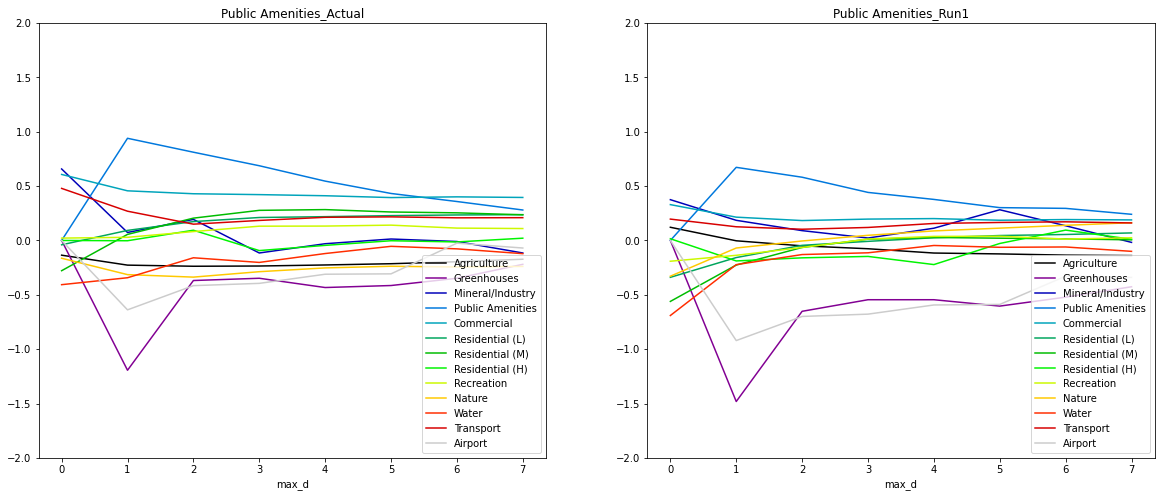

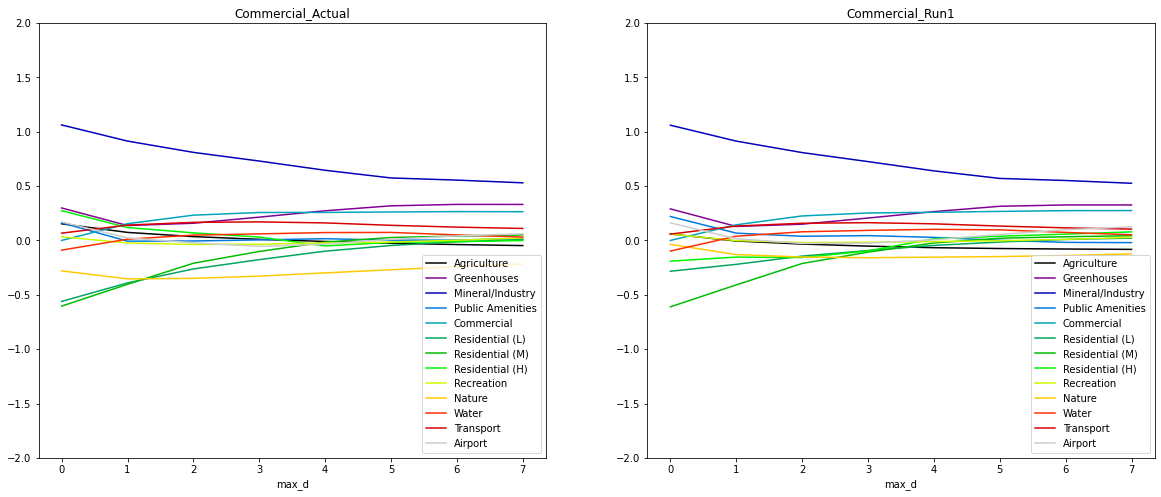

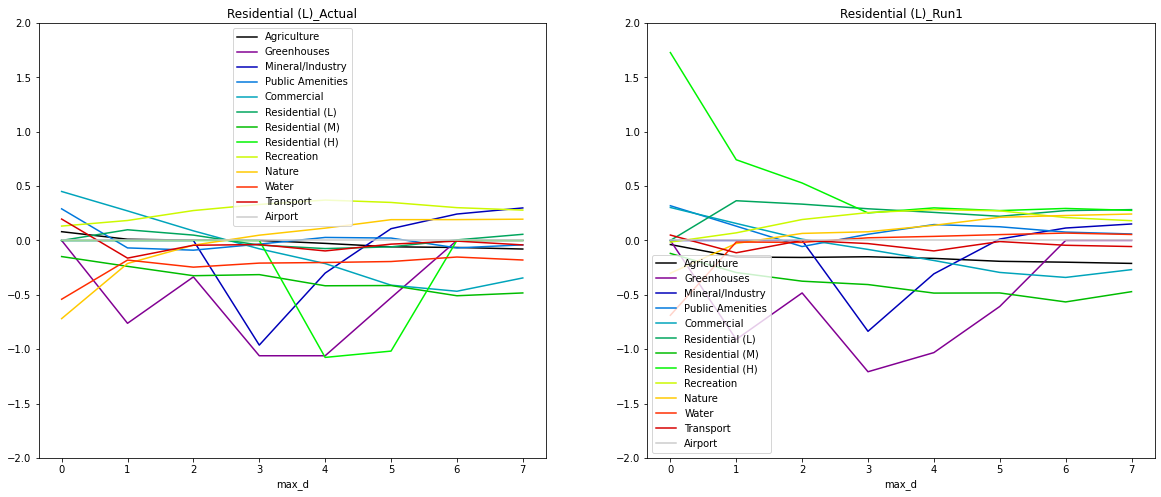

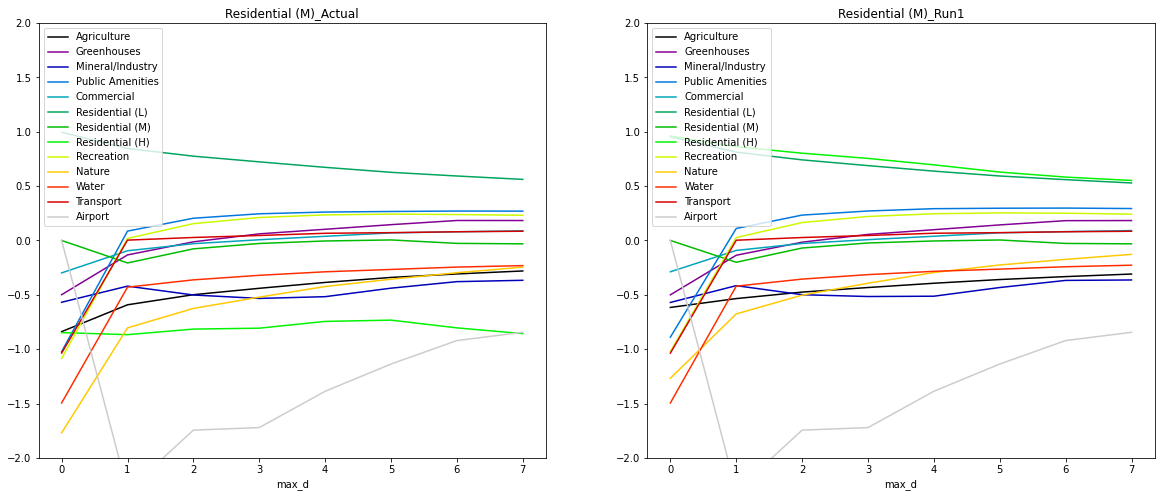

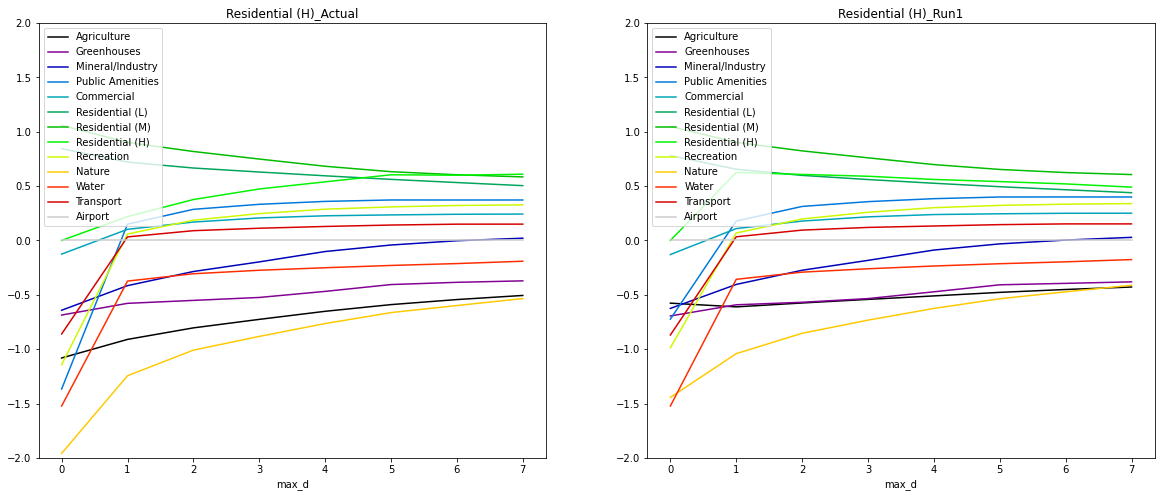

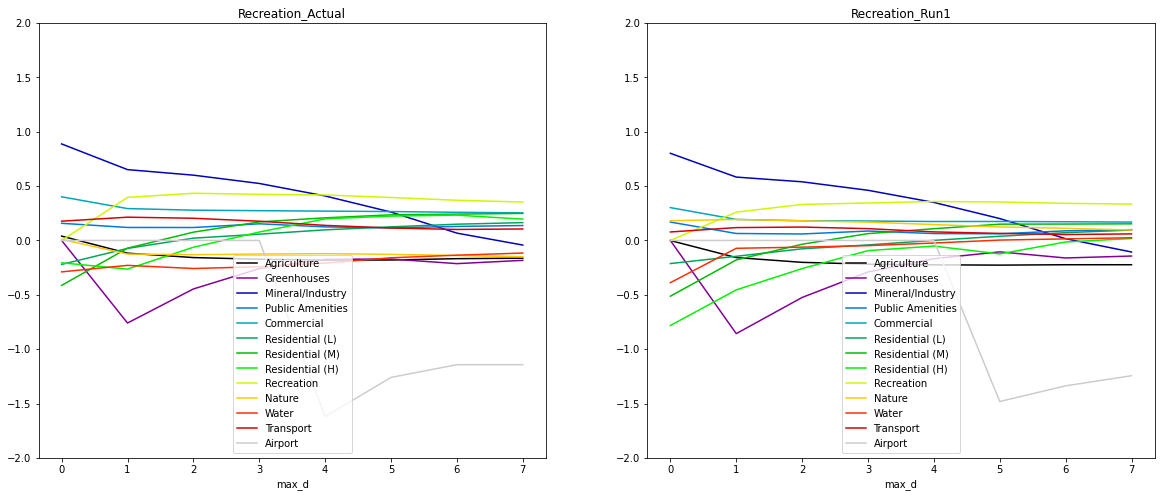

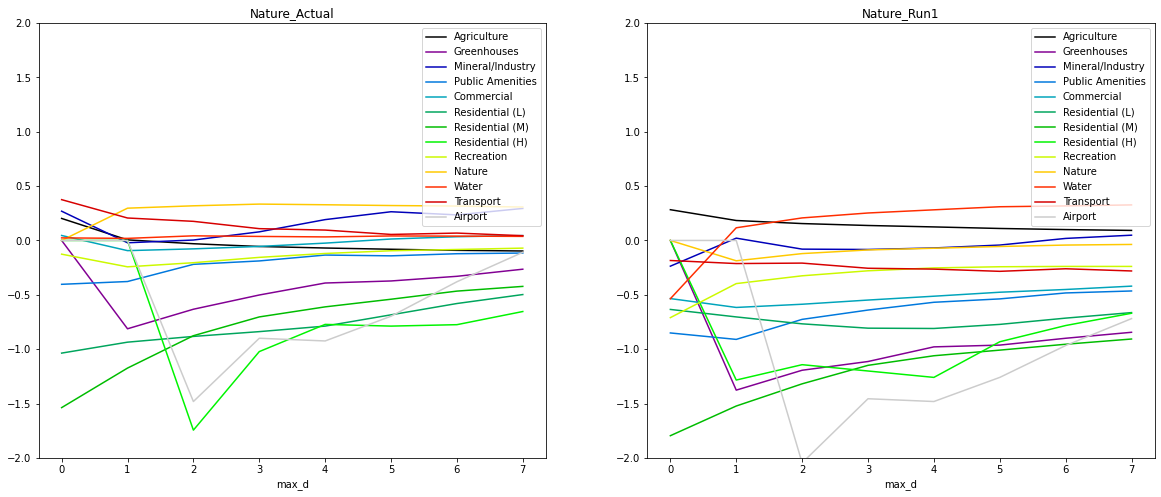

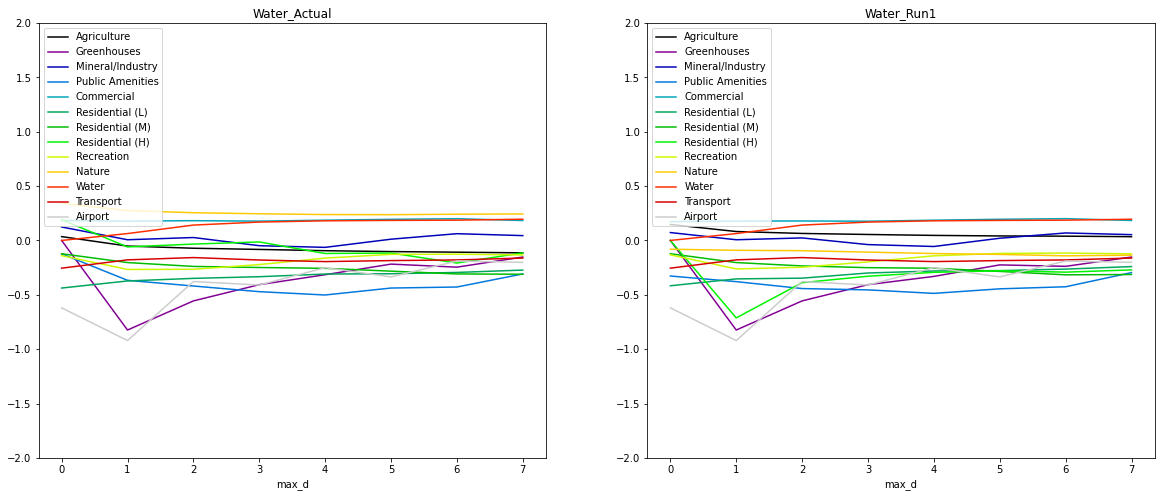

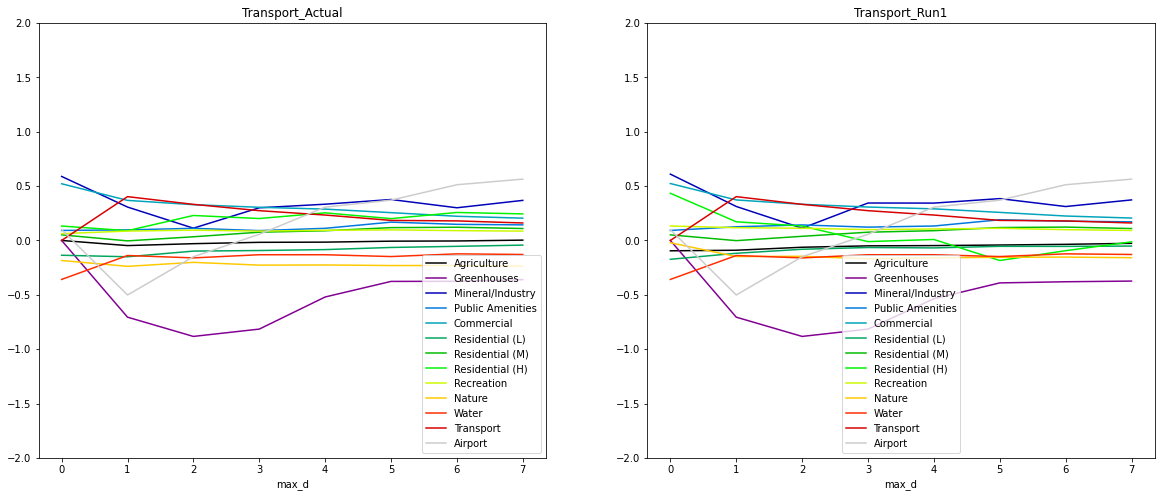

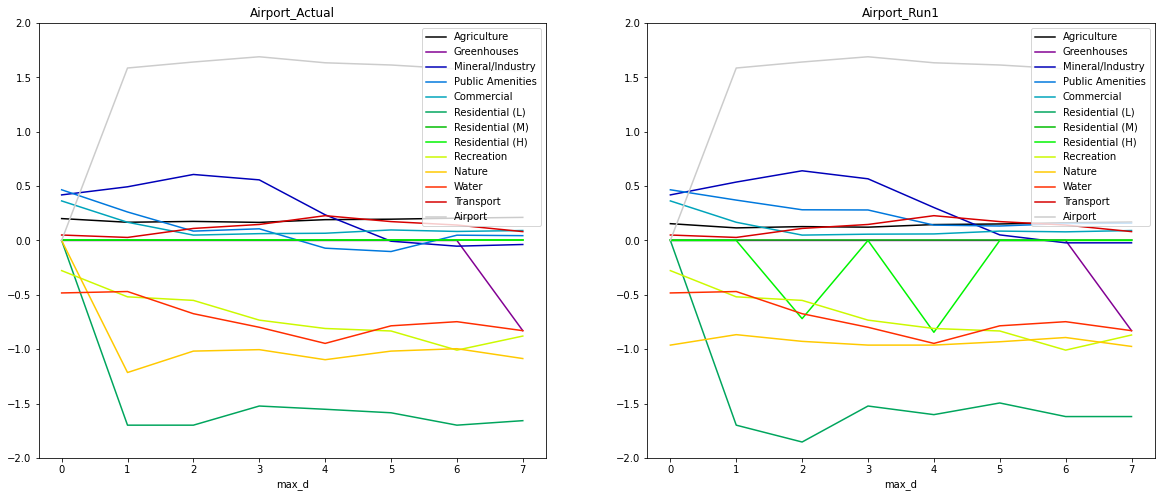

In [77]:
rootpath='C:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\ABM\\ENC_Py3_mra\\EU_output\\Amsterdam\\enrichment_factors_run1\\'
for i in range(1,14): #range of q
    fig,ax = plt.subplots(1,2,figsize=(20,8))
    landuse_cols= er1.columns[:-2]
    colormap = plt.cm.nipy_spectral
    colors = [colormap(i) for i in np.linspace(0, 1,13)]
    ax[0].set_prop_cycle('color', colors)
    ax[1].set_prop_cycle('color', colors)
    #plotting actual enrichment curves
    er1.loc[er1['q']==i].set_index('max_d').drop(columns=['q']).plot(ax=ax[0])
    ax[0].set_title(name_map[i]+'_Actual')
    ax[0].set_ylim([-2,2])
    #plotting new enrichment factors
    er2.loc[er2['q']==i].set_index('max_d').drop(columns=['q']).plot(ax=ax[1])
    ax[1].set_title(name_map[i]+'_Run1')
    ax[1].set_ylim([-2,2])
    if i==3:
        plt.savefig(rootpath+'mineral_industry_run1.png')
    else:
        plt.savefig(rootpath+name_map[i]+'_run1.png')
    